In [10]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adagrad, SGD


mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
model = tf.keras.Sequential()

layers = tf.keras.layers

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(72, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

ada_optimizer = Adagrad(learning_rate = 0.01)

model.compile(optimizer = ada_optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ada_history = model.fit(x_train, y_train, epochs = 10, validation_data = [x_test, y_test])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8113 - loss: 0.7246 - val_accuracy: 0.9174 - val_loss: 0.2932
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9184 - loss: 0.2867 - val_accuracy: 0.9319 - val_loss: 0.2389
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9315 - loss: 0.2431 - val_accuracy: 0.9391 - val_loss: 0.2163
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9394 - loss: 0.2143 - val_accuracy: 0.9441 - val_loss: 0.1969
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9463 - loss: 0.1941 - val_accuracy: 0.9470 - val_loss: 0.1834
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9488 - loss: 0.1809 - val_accuracy: 0.9502 - val_loss: 0.1730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9523 - loss: 0.1687 - val_accuracy: 0.9535 - val_loss: 0.1633
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9558 - loss: 0.1584

In [9]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9500 - loss: 0.1762


[0.15055744349956512, 0.9574000239372253]

In [18]:
# Define a new model for SGD by cloning the original model
model_sgd = tf.keras.models.clone_model(model)  # Create a new model by duplicating the architecture of the original model

sgd_optimizer = SGD(learning_rate = 0.01)
model_sgd.compile(optimizer = sgd_optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
sgd_history = model_sgd.fit(x_train, y_train, epochs = 10, validation_data = [x_test, y_test])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7203 - loss: 1.0512 - val_accuracy: 0.9023 - val_loss: 0.3659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9003 - loss: 0.3571 - val_accuracy: 0.9162 - val_loss: 0.3008
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9171 - loss: 0.2972 - val_accuracy: 0.9262 - val_loss: 0.2680
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9227 - loss: 0.2732 - val_accuracy: 0.9307 - val_loss: 0.2501
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9299 - loss: 0.2464 - val_accuracy: 0.9378 - val_loss: 0.2289
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9348 - loss: 0.2294 - val_accuracy: 0.9403 - val_loss: 0.2127
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9402 - loss: 0.2151 - val_accuracy: 0.9431 - val_loss: 0.2005
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9454 - loss: 0.1975

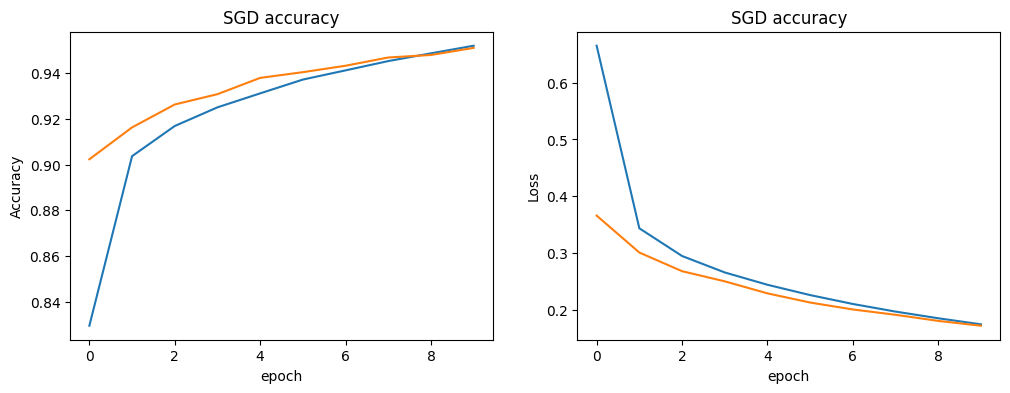

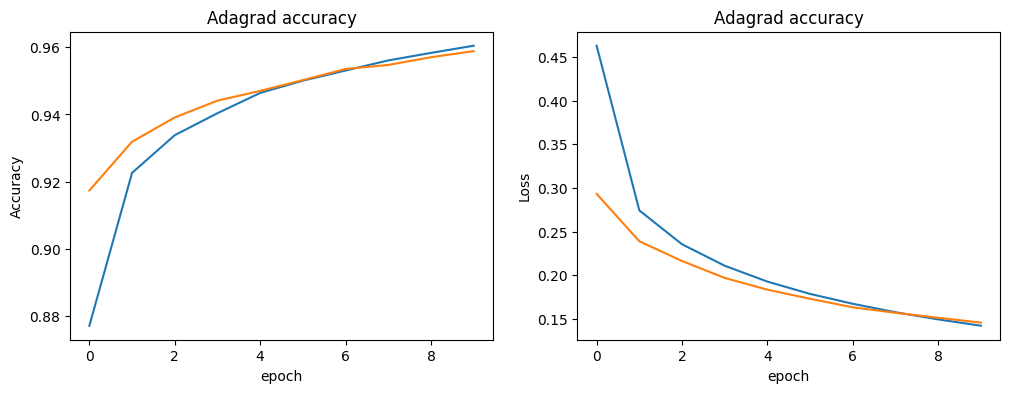

In [21]:
import matplotlib.pyplot as plt

def plot_history(training_history, title):
  plt.figure(figsize = (12, 4))

  plt.subplot(1, 2, 1)

  plt.plot(training_history.history['accuracy'], label = 'Training Accuracy')

  plt.plot(training_history.history['val_accuracy'], label = 'Test Accuracy')

  plt.xlabel('epoch')

  plt.ylabel('Accuracy')

  plt.title(title + ' accuracy')

  plt.subplot(1, 2, 2)

  plt.plot(training_history.history['loss'], label = 'Training Loss')

  plt.plot(training_history.history['val_loss'], label = 'Test Loss')

  plt.xlabel('epoch')

  plt.ylabel('Loss')

  plt.title(title + ' accuracy')

  plt.show()

plot_history(sgd_history, 'SGD')
plot_history(ada_history, 'Adagrad')